## Redemption Decay Functions for Reconciliation Estimation

DATASET CONSTRUCTION INFORMATION


This file describes the creation of the first model for Kroger  Bayer.
Weekly reports were provided by Bayer. Each report contained a file for one offer, with weekly redemption of coupons reported. Only coupons with data. Each week in a file was given a week number, as well as a new percentage derived from the percentage that was the wrong type in each file. A formula was then derived from the weekly number and the percentage of coupons redeemed.

In [241]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
from datetime import date

In [242]:
df = pd.read_csv('C:/Users/norri/Desktop/Bayer_Models/Tinactin.csv')

Tentative code for reading in multiple files in multiple folders.

In [243]:
# for filename in os.listdir(getcwd()):
#     with open(os.path.join.os.getcwd(), filename), 'r') as f:
#         print(f.read())
# os.chdir('path/to/directory')

This next line is only necessary if the grand total line is in the dataset. Otherwise, skip.

In [244]:
# df.drop(df.tail(1).index,inplace=True)

In [245]:
df['Date'] = pd.to_datetime(df['Date'])

Once the date is corrected, a column for the week number is created.

In [246]:
# df.sort_values(by=['Date'], inplace=True)
# df['Week_Number'] =  np.arange(df.shape[0]) + 1

This function fits the plotted points to an equation of the form y = a * exp(-b * x).

In [247]:
def func(x, a, b):
    """
    This function defines the formula
    That we are optimizing, note that since
    The exponential function (non-normalized)
    "Has two parameters" of interest
    :param x: Percentage completed redemption in one period
    :param a: constant coefficient
    :param b: coefficient for x in the exponent of e
    :return: returns a and b, the best estimates for the curve
    """
    return a * np.exp(-b * (x))

This function calculates the r-squared value for the curve fit.

In [248]:
def r_squared(x, y, a, b):
    """
    Calculates r-squared, accurate for fitting best fit line
    :param x: x observations
    :param y: y observations
    :param a: coefficient estimate returned from func
    :param b: coefficient estimate returned from func
    :return: r-squared calculation and printout
    """
    res = y - func(x, a, b)
    ss_r = np.sum(res ** 2)
    ss_tot = np.sum((y - np.mean(y) ** 2))
    r_sq = np.round((1 - (ss_r / ss_tot)), 4)
    print(f'R^2 = {r_sq}')
    print(f'Curve Formula: y={a}*exp^(-{b}*(x)')

Plots the curve after fitting.

In [249]:
def plot_curve(x, y, a, b):
    """
    Converts the existing x and y data and the
    best fit curve parameters a and b to create
    a plot
    :param x:
    :param y:
    :param a:
    :param b:
    :return:
    """
    x_est = np.arange(min(x), max(x))
    y_curve = a*np.exp(-b*x_est)
    plt.figure(figsize=(6,6))
    plt.scatter(x, y, s=12)
    plt.xlabel('Week Number')
    plt.ylabel('Percentage of Coupons Redeemed')
    plt.title('Coupon Model Fit')
    plt.plot(x_est, y_curve, '--', color='red')
    plt.show()

Executes each function at once.

In [250]:
def output(x, y, p0):
    """
    This combines all the functions and
    creates the plot, formula for estimates
    and r-squared
    :param x: x data
    :param y: y data
    :param p0: interval in which the curve-fitting
    function begins its search
    :return: plot of data against estimate, model formula
    estimate, and r-squared
    """
    popt, pcov = cf(func, x, y, p0)
    a = np.round(popt[0], 5)
    b = np.round(popt[1], 5)
    r_squared(x, y, a, b)
    plot_curve(x, y, a, b)
    return a, b

#### Creation of file for Curve Formula
1. As the data is currently in an unsupported format, every brand weekly sheet must be opened and copied to a cumulative sheet
2. Create new columns for Week Number and Percentage, which represents the percentage of coupon redemption for that week
3. Divide the coupon redemption percent by 100 to get a proper percentage
4. After appending all weekly data for a single brand, save it as a csv
5. Visualize the Week Number  on the x-axis and the Percentage on the y-axis
6. This scatter plot, separated by brand, is what the curve fitting portion creates the equation from
7. Repeat for each brand, recording the R-Squared and the equation for prediction redemeption

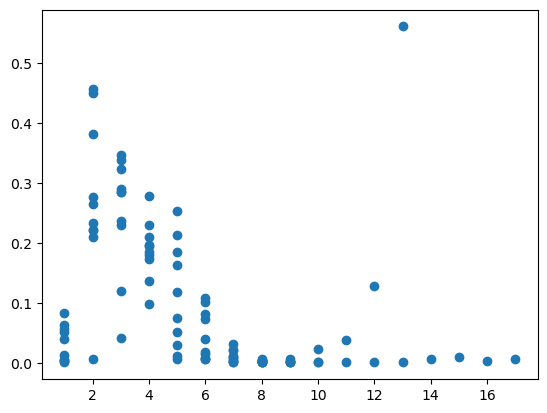

In [251]:
x = df['Week_Number']
y = df['Percentage']
plt.scatter(x, y)

A concave trendline with a long tail is the best fit for the data, so an exponential decay function is used.

In [252]:
p0 = [1.0, .05]

This sets the values for x and y so that the curve fitting function can estimate a and b.

In [253]:
x = df['Week_Number'].to_numpy(dtype=float)
y = df["Percentage"].to_numpy(dtype=float)

In [254]:
df.value_counts('Week_Number')

Week_Number
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9      6
10     3
11     2
12     2
13     2
14     1
15     1
16     1
17     1
dtype: int64

Fit Chart
R^2 = 0.8538
Curve Formula: y=0.21909*exp^(-0.15155*(x)


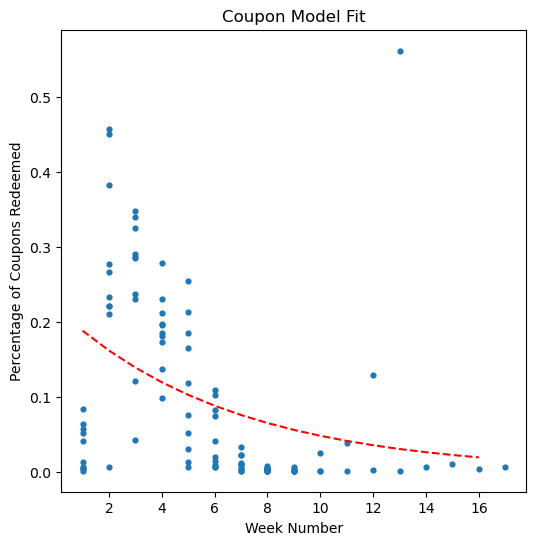

In [255]:
# Provides plots and estimates
print('Fit Chart')
a, b = output(x, y, p0)